In [1]:
import pandas as pd
df = pd.read_csv('Players.csv')
df['collage'] = df['collage'].fillna('Unknown')
df['birth_state'] = df['birth_state'].fillna('Unknown')
df.to_csv('Players(processed).csv', index=False)

Height Frequency:
height
201.0    403
206.0    386
203.0    377
196.0    356
190.0    337
198.0    337
193.0    299
208.0    291
188.0    261
211.0    219
185.0    179
213.0    154
183.0    116
216.0     51
180.0     50
178.0     35
218.0     27
221.0     12
175.0      9
226.0      5
224.0      4
170.0      3
229.0      3
173.0      2
231.0      2
168.0      1
160.0      1
165.0      1
Name: count, dtype: int64

Weight Frequency:
weight
83.0     291
95.0     281
86.0     273
99.0     262
97.0     223
        ... 
149.0      1
137.0      1
60.0       1
69.0       1
163.0      1
Name: count, Length: 76, dtype: int64
Mean Height: 198.70492221372098
Mean Weight: 94.78321856669217
Median Height: 198.0
Median Weight: 95.0


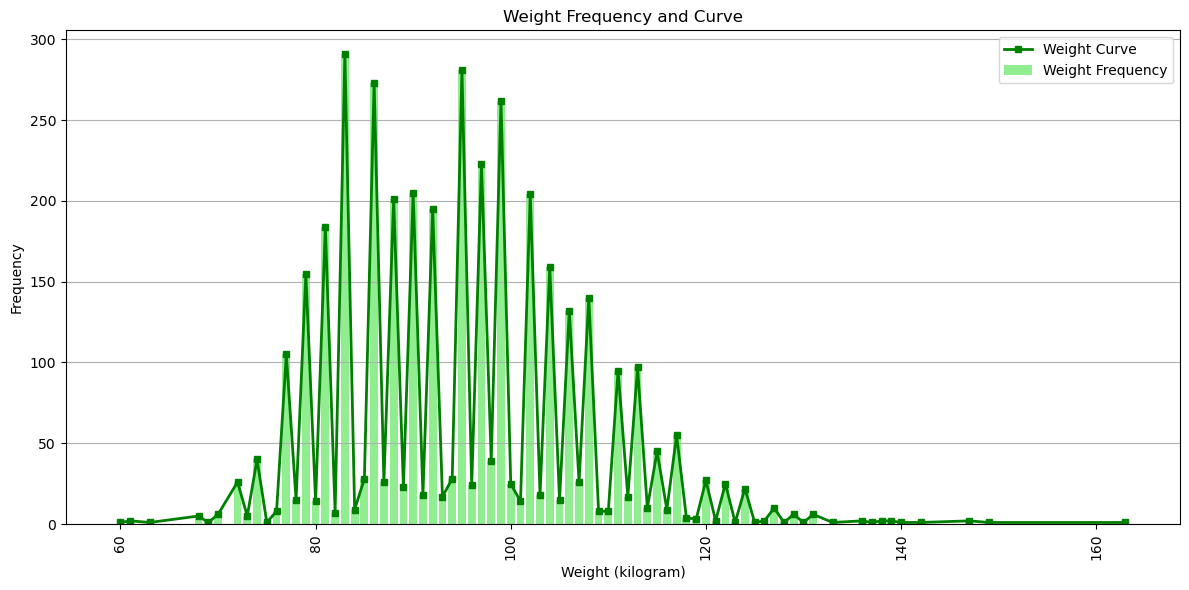

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Players(processed).csv')
height_freq = df['height'].value_counts()
weight_freq = df['weight'].value_counts()
print("Height Frequency:")
print(height_freq)
print("\nWeight Frequency:")
print(weight_freq)
mean_height = df['height'].mean()
mean_weight = df['weight'].mean()
median_height = df['height'].median()
median_weight = df['weight'].median()
print("Mean Height:", mean_height)
print("Mean Weight:", mean_weight)
print("Median Height:", median_height)
print("Median Weight:", median_weight)

# 绘制二维散点图
plt.figure(figsize=(10, 8))
plt.scatter(df['height'], df['weight'], alpha=0.5)
plt.title('Height vs Weight Scatter Plot')
plt.xlabel('Height (centimeter)')
plt.ylabel('Weight (kilogram)')
plt.grid(True)
plt.show()

height_freq = df['height'].value_counts().sort_index()
weight_freq = df['weight'].value_counts().sort_index()

# 绘制身高频次柱状图和曲线图
plt.figure(figsize=(12, 6))
plt.bar(height_freq.index, height_freq.values, color='gold', label='Height Frequency')
plt.plot(height_freq.index, height_freq.values, color='yellow', marker='o', linestyle='-', linewidth=2, markersize=5, label='Height Curve')
plt.title('Height Frequency and Curve')
plt.xlabel('Height (centimeter)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

# 绘制体重频次柱状图和曲线图
plt.figure(figsize=(12, 6))
plt.bar(weight_freq.index, weight_freq.values, color='lightgreen', label='Weight Frequency')
plt.plot(weight_freq.index, weight_freq.values, color='green', marker='s', linestyle='-', linewidth=2, markersize=5, label='Weight Curve')
plt.title('Weight Frequency and Curve')
plt.xlabel('Weight (kilogram)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

sns.jointplot(x="height", y="weight", data=df, kind='hex', color='blue')
plt.show()

In [19]:
import pandas as pd
df = pd.read_csv('Players(processed).csv')
mean_height = df['height'].mean()
mean_weight = df['weight'].mean()

mean_bmi = mean_weight / (mean_height / 100) ** 2

def calculate_bmi_and_advice(height, weight):
    bmi = weight / (height / 100) ** 2
    advice = ""
    if bmi > mean_bmi + 1.5:
        advice = "BMI is too high, consider losing weight."
    elif bmi < mean_bmi - 1.5:
        advice = "BMI is too low, consider gaining weight."
    else:
        advice = "BMI is within the acceptable range, keep it up."
    return bmi, advice

def calculate_score_and_level(weight, height):
    score = 100 - 0.35 * (weight - mean_weight) ** 2 - 0.2 * (height - mean_height) ** 2
    if score >= 75:
        level = "A+, Nice figure. You got Hall of Fame potential.( ^ω^ )"
    elif score >= 50:
        level = "A, That's good. You're already outstanding. (⊙o⊙)"
    elif score >= 25:
        level = "B, Not bad. Keep going.( ´▽` )"
    elif score >= 0:
        level = "C, Well, you might need to step up your exercise.( ･᷄д･᷅ )"
    else:
        level = "D, Never give up.(°ー°〃)"
    return score, level

input_height = float(input("Please enter the player's height (cm): "))
input_weight = float(input("Please enter the player's weight (kg): "))

bmi, advice = calculate_bmi_and_advice(input_height, input_weight)
print(f"Player's BMI: {bmi:.2f}, Advice: {advice}")

score, level = calculate_score_and_level(input_weight, input_height)
print(f"Player's score: {score:.2f}, Level: {level}")

Please enter the player's height (cm):  190
Please enter the player's weight (kg):  94


Player's BMI: 26.04, Advice: BMI is too high, consider losing weight.
Player's score: 84.63, Level: A+, Nice figure. You got Hall of Fame potential.( ^ω^ )
